<a href="https://colab.research.google.com/github/asenka239/compMath/blob/main/findpapers_st_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# О блокноте

**Цель блокнота**: получить информацию о динамике публикаций в интересующей области.

**Метод**: динамическое тематическое моделирование, то есть анализ того, как представлена та или иная тема с течением времени. Подробнее [тут](https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html).

In [ ]:
%%capture
!pip install findpapers

In [ ]:
!findpapers search results.json --query "[Superconductivity] AND [SQUID]" --limit 400

2024-03-12 08:12:16,828 INFO: Let's find some papers, this process may take a while...
2024-03-12 08:12:16,829 INFO: Fetching papers from arXiv database...
2024-03-12 08:12:19,905 INFO: arXiv: 857 papers to fetch
2024-03-12 08:12:19,905 INFO: (1/857) Fetching arXiv paper: Developments on frequency domain multiplexing readout for large arrays
  of transition-edge sensor X-ray micro-calorimeters
2024-03-12 08:12:19,907 INFO: (2/857) Fetching arXiv paper: Large tunable kinetic inductance in a twisted graphene superconductor
2024-03-12 08:12:19,907 INFO: (3/857) Fetching arXiv paper: Anodization-free fabrication process for high-quality cross-type
  Josephson tunnel junctions based on a Nb/Al-AlO$_x$/Nb trilayer
2024-03-12 08:12:19,907 INFO: (4/857) Fetching arXiv paper: Simple, High Saturation Power, Quantum-limited, RF SQUID Array-based
  Josephson Parametric Amplifiers
2024-03-12 08:12:19,907 INFO: (5/857) Fetching arXiv paper: Magnetic-field dependence of a Josephson traveling-wave par

In [ ]:
import json

with open('results.json') as f:
    data = json.load(f)

In [ ]:
abstract = [paper['abstract'] for paper in data['papers']]
date = [paper['publication_date'] for paper in data['papers']]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({'text': abstract, 'date': date})

In [ ]:
df.head()

,text,date
0,At SRON we have been developing X-ray TES micr...,2024-03-05
1,Twisted graphene based moir\'e heterostructure...,2024-03-04
2,Josephson tunnel junctions form the basis for ...,2024-03-04
3,High-fidelity quantum non-demolition qubit mea...,2024-02-29
4,We investigate the effect of magnetic field on...,2024-02-29


In [ ]:
df.shape

(400, 2)

In [ ]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].str.lower()

In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.year

In [ ]:
print(df['date'].min())
print(df['date'].max())

2016
2024


In [ ]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

(array([2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.,
        2024., 2025.]),
 [Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022'),
  Text(2023.0, 0, '2023'),
  Text(2024.0, 0, '2024'),
  Text(2025.0, 0, '2025')])

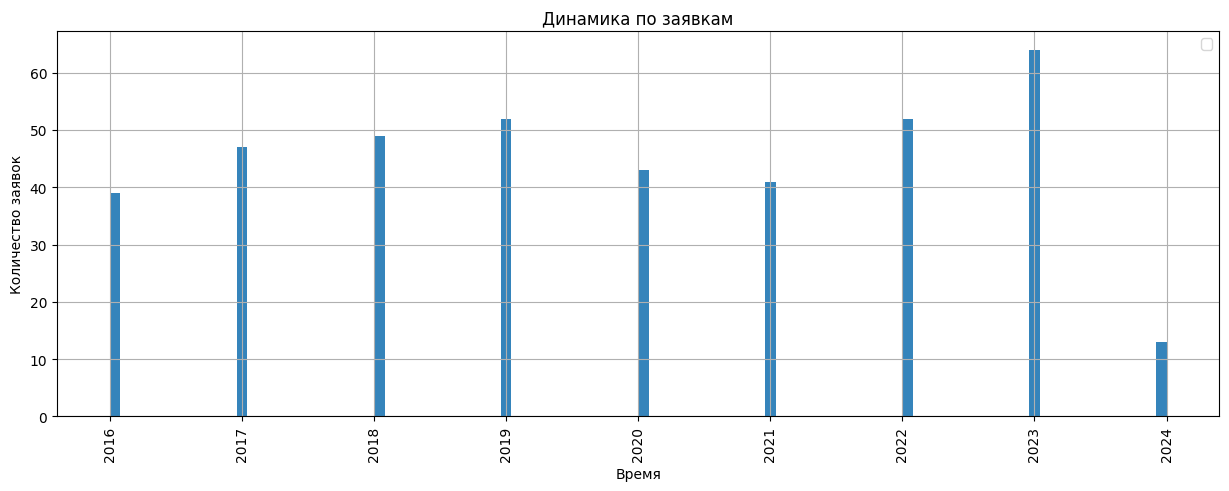

In [ ]:
df['date'].hist(bins=100, figsize = (15,5), alpha=0.9)
pl.title('Динамика по заявкам')
pl.xlabel('Время')
pl.ylabel('Количество заявок')
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')

In [ ]:
timestamps = df.date.to_list()
corpus = df.text.to_list()

In [ ]:
%%capture
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-distilroberta-v1')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings = model.encode(corpus)
embeddings.shape

(400, 768)

In [ ]:
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial import distance

In [ ]:
cosine_scores = util.cos_sim(embeddings, embeddings)

In [ ]:
import seaborn as sns
import numpy as np

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


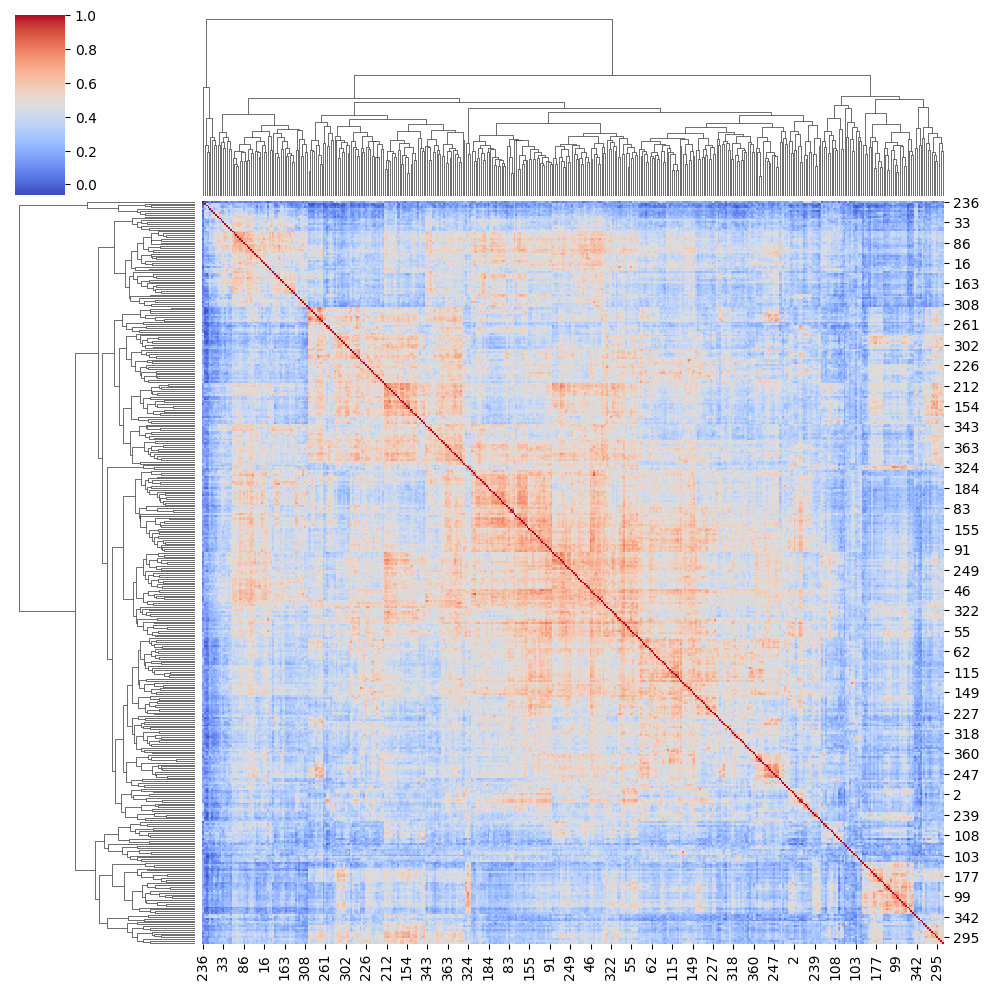

In [ ]:
sns.clustermap(np.asarray(cosine_scores), cmap="coolwarm")

In [ ]:
threshold = 0.5 * distance.pdist(cosine_scores).max()
Z = linkage(cosine_scores, method='complete')
clusters = fcluster(Z, threshold, criterion='distance')

In [ ]:
df['cluster'] = clusters

In [ ]:
df['cluster'] = df['cluster'].astype(int)

In [ ]:
df.head()

,text,date,cluster
0,at sron we have been developing x-ray tes micr...,2024,6
1,twisted graphene based moir\'e heterostructure...,2024,2
2,josephson tunnel junctions form the basis for ...,2024,3
3,high-fidelity quantum non-demolition qubit mea...,2024,3
4,we investigate the effect of magnetic field on...,2024,3


In [ ]:
df['cluster'].value_counts()

3    127
2     96
1     79
5     44
6     27
7     23
4      4
Name: cluster, dtype: int64

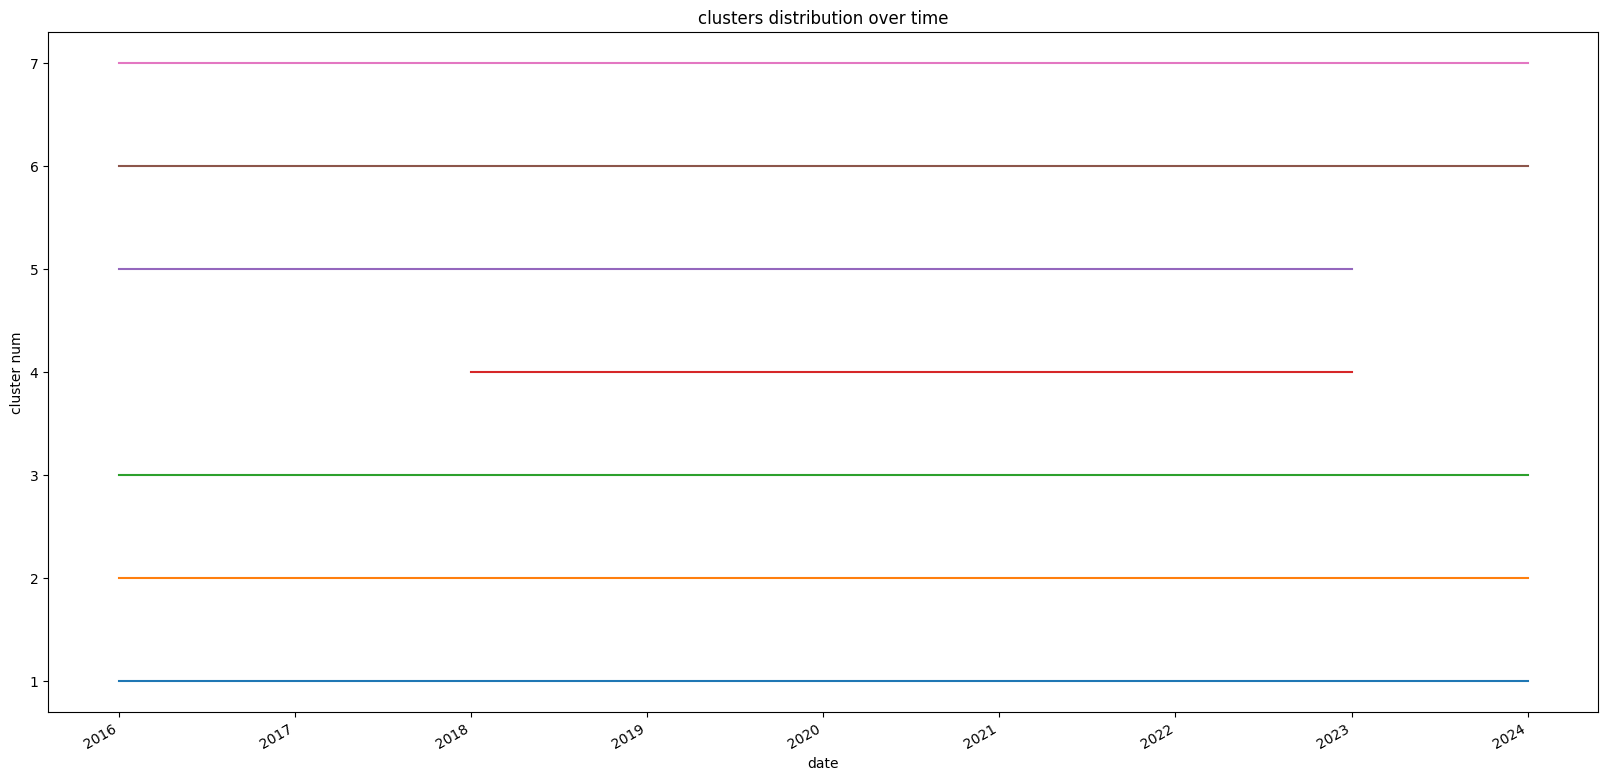

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'date' column and a 'cluster' column
df1 = df.copy()

# Set the 'date' column as the DataFrame's index
df1.set_index('date', inplace=True)

# Group the data by clusters
grouped = df1.groupby('cluster')

fig, ax = plt.subplots(figsize=(20,10))

# Plot the data for each cluster without creating a legend
for name, group in grouped:
    group.plot(ax=ax, legend=False)

# Rotate date labels automatically
fig.autofmt_xdate()

# Customize the plot
plt.xlabel('date')
plt.ylabel('cluster num')
plt.title('clusters distribution over time')
plt.show()


In [ ]:
df_info_filter = df[df['cluster'] == 1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


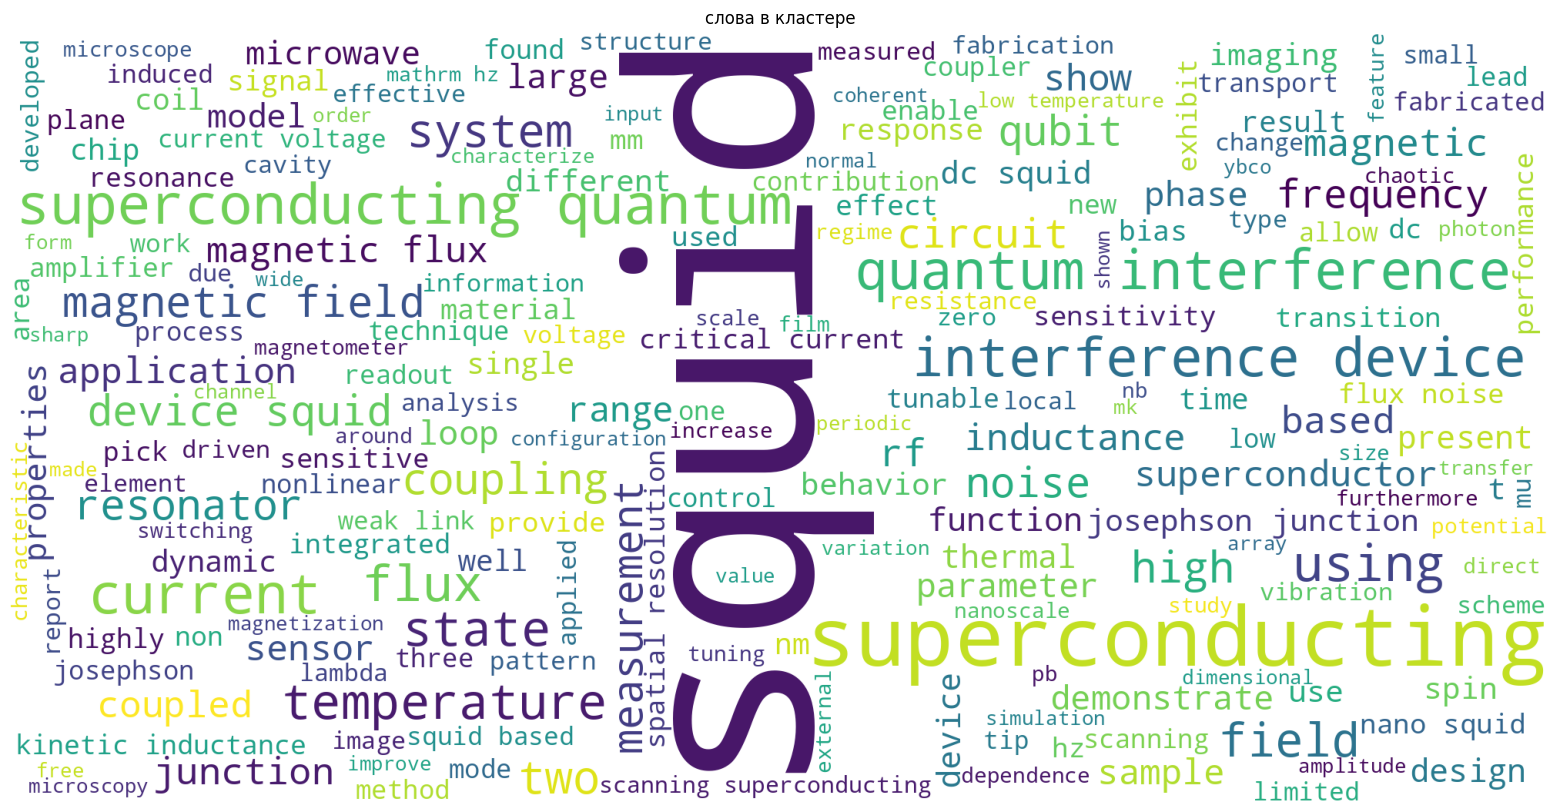

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
text = ' '.join(df_info_filter["text"].str.lower().tolist())
filtered_text = ' '.join([word for word in text.split() if word not in stopwords])
plt.figure(figsize=(20,10))
wordcloud=WordCloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(str(filtered_text))
plt.title("слова в кластере")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()